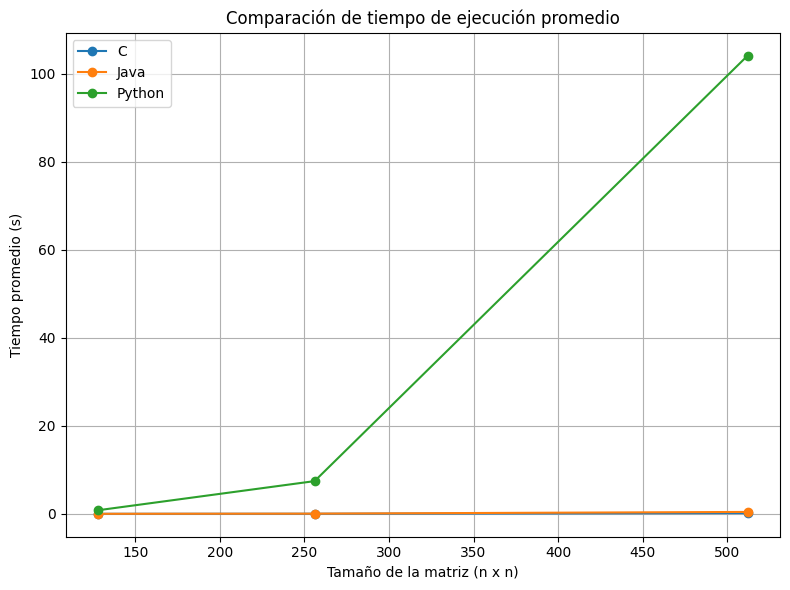

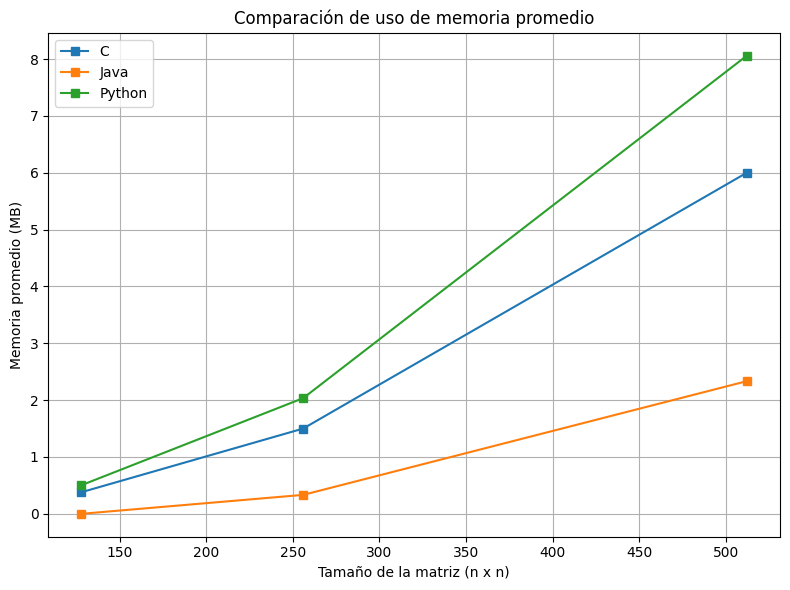


📊 Resultados combinados:
 Matrix_Size  Avg_Time(s)  Avg_Memory(MB) Language  CPU_Time(s)
         128     0.004469        0.380000        C     0.004519
         256     0.019309        1.500000        C     0.019315
         512     0.171863        6.000000        C     0.171870
         128     0.007560        0.000000     Java          NaN
         256     0.044201        0.333300     Java          NaN
         512     0.433166        2.333300     Java          NaN
         128     0.818467        0.503637   Python          NaN
         256     7.437344        2.034978   Python          NaN
         512   104.119388        8.058534   Python          NaN


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1️⃣ Cargar los resultados ---
results_python = pd.read_csv('MatrixMult_Py/matrix_mult/results_python.csv', sep=',')
results_java = pd.read_csv('MatrixMult_Java/MatrixMultiplication/results_java.csv', sep=',')
results_c = pd.read_csv('MatrixMult_C/results.csv', sep=',')

# --- 2️⃣ Normalizar nombres de columnas ---
# Python y Java tienen 3 columnas
results_python.columns = ['Matrix_Size', 'Avg_Time(s)', 'Avg_Memory(MB)']
results_java.columns = ['Matrix_Size', 'Avg_Time(s)', 'Avg_Memory(MB)']

# C tiene una columna adicional
if len(results_c.columns) == 4:
    results_c.columns = ['Matrix_Size', 'Avg_Time(s)', 'Avg_Memory(MB)', 'CPU_Time(s)']
else:
    results_c.columns = ['Matrix_Size', 'Avg_Time(s)', 'Avg_Memory(MB)']

# --- 3️⃣ Añadir columna de lenguaje ---
results_python['Language'] = 'Python'
results_java['Language'] = 'Java'
results_c['Language'] = 'C'

# --- 4️⃣ Combinar todos los resultados ---
combined = pd.concat([results_python, results_java, results_c], ignore_index=True)

# --- 5️⃣ Gráfica 1: Tiempo de ejecución promedio ---
plt.figure(figsize=(8, 6))
for lang, data in combined.groupby('Language'):
    plt.plot(data['Matrix_Size'], data['Avg_Time(s)'], marker='o', label=lang)

plt.title('Comparación de tiempo de ejecución promedio')
plt.xlabel('Tamaño de la matriz (n x n)')
plt.ylabel('Tiempo promedio (s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('results_comparison_time.png', dpi=300)
plt.show()

# --- 6️⃣ Gráfica 2: Uso de memoria promedio ---
plt.figure(figsize=(8, 6))
for lang, data in combined.groupby('Language'):
    plt.plot(data['Matrix_Size'], data['Avg_Memory(MB)'], marker='s', label=lang)

plt.title('Comparación de uso de memoria promedio')
plt.xlabel('Tamaño de la matriz (n x n)')
plt.ylabel('Memoria promedio (MB)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('results_comparison_memory.png', dpi=300)
plt.show()

# --- 7️⃣ Gráfica 3 (solo si C tiene CPU time) ---
if 'CPU_Time(s)' in results_c.columns:
    plt.figure(figsize=(8, 6))
    plt.plot(results_c['Matrix_Size'], results_c['CPU_Time(s)'], marker='^', color='red', label='C - CPU Time')
    plt.title('Tiempo de CPU (solo C)')
    plt.xlabel('Tamaño de la matriz (n x n)')
    plt.ylabel('Tiempo CPU (s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('results_comparison_cpu_c.png', dpi=300)
    plt.show()

# --- 8️⃣ Mostrar tabla combinada ---
print("\n📊 Resultados combinados:")
print(combined.sort_values(['Language', 'Matrix_Size']).to_string(index=False))
